# Курбанова Комила, БПМИ218

# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [2]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [3]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [7]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 472 ms, sys: 5.21 ms, total: 477 ms
Wall time: 486 ms
Train ROC-AUC 0.9898
Valid ROC-AUC 0.9053
Test ROC-AUC 0.9087


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

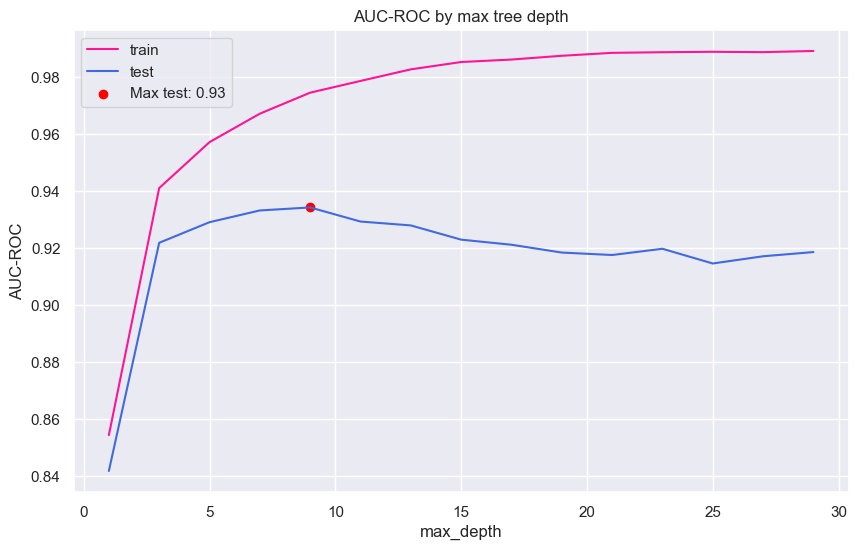

Best max_depth value for 'test': 9


In [24]:
from collections import defaultdict
import plotly.graph_objects as go

results = defaultdict()
results['train'] = []
results['test'] = []

depths = range(1, 30, 2)
for depth in depths:
    boosting = Boosting({'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(boosting.score(x_train, y_train))
    results['test'].append(boosting.score(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, results['train'], label='train', color='deeppink')
plt.plot(depths, results['test'], label='test', color='royalblue')

max_test_index = results['test'].index(max(results['test']))
max_test_value = max(results['test'])
max_depth_value = depths[max_test_index]

plt.scatter(depths[max_test_index], max_test_value, color='red', label=f'Max test: {max_test_value:.2f}')

plt.title('AUC-ROC by max tree depth')
plt.xlabel('max_depth')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

print(f"Best max_depth value for 'test': {max_depth_value}")

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшими здесь выступают модели с глубиной между 5 и 10, конкретно в этом примере 9. В целом, логично, потому что чем глубже дерево, тем больше вероятность переобучения (что как раз видно на графике, проседает качество). Можно было бы подумать, что 9 – это довольно глубокое дерево, но так как у нас изначально 169 признаков, это вполне приемлемо

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [27]:
%pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 588.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [120]:
import optuna

def objective(trial):
    params = {
        'base_model_params' : {'max_depth': trial.suggest_int('max_depth', 3, 15),
                               'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20, log=True),
                               'min_samples_split' : trial.suggest_int('min_samples_split', 2, 20, log=True)
                               },
        'early_stopping_rounds' : trial.suggest_int('early_stopping_rounds', 5, 100, step=15),
        'n_estimators': trial.suggest_int('n_estimators', 1, 100, step=3),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'subsample': trial.suggest_loguniform('subsample', 0.1, 1.0)
    }

    model = Boosting(**params)
    model.fit(x_train, y_train, x_valid, y_valid)
    auc = model.score(x_valid, y_valid)

    return auc


In [160]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-24 02:19:58,847] A new study created in memory with name: no-name-7d2b178a-efe6-4535-b766-e6f00f8c2f16


[I 2023-12-24 02:20:00,030] Trial 0 finished with value: 0.9377981742179525 and parameters: {'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 2, 'early_stopping_rounds': 65, 'n_estimators': 100, 'learning_rate': 0.032743161504893314, 'subsample': 0.21302563954937082}. Best is trial 0 with value: 0.9377981742179525.
[I 2023-12-24 02:20:01,805] Trial 1 finished with value: 0.9351836996630836 and parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'early_stopping_rounds': 35, 'n_estimators': 31, 'learning_rate': 0.07442118458737029, 'subsample': 0.6077696520143694}. Best is trial 0 with value: 0.9377981742179525.
[I 2023-12-24 02:20:03,764] Trial 2 finished with value: 0.9372087101792497 and parameters: {'max_depth': 14, 'min_samples_leaf': 17, 'min_samples_split': 2, 'early_stopping_rounds': 35, 'n_estimators': 43, 'learning_rate': 0.0012193117791667193, 'subsample': 0.732000063782386}. Best is trial 0 with value: 0.9377981742179525.
[I 2023-12-24 02

In [161]:
print(f'Best AUC-ROC = {study.best_trial.value}')

Best AUC-ROC = 0.9413836480999463


In [162]:
import pandas as pd

best_auc_roc = study.best_trial.value
best_params = study.best_trial.params
data = {'AUC-ROC': [best_auc_roc]}
data.update(best_params)
df = pd.DataFrame(data).set_index('AUC-ROC').T
df

AUC-ROC,0.941384
max_depth,11.000000
min_samples_leaf,16.000000
min_samples_split,20.000000
early_stopping_rounds,95.000000
n_estimators,100.000000
learning_rate,0.094035
subsample,0.742306


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [267]:
params = {
        'base_model_params' : {'max_depth': best_params['max_depth'],
                                'min_samples_leaf' : best_params['min_samples_leaf'],
                                'min_samples_split' : best_params['min_samples_split']
                                },
        'early_stopping_rounds' : best_params['early_stopping_rounds'],
        'n_estimators': best_params['n_estimators'],
        'learning_rate': best_params['learning_rate'],
        'subsample': best_params['subsample']
}

In [176]:
best_boosting_model = Boosting(**params)
best_boosting_model.fit(x_train, y_train, x_valid, y_valid)
boosting_pred = best_boosting_model.predict_proba(x_test)[:, 1]

logreg_model = LogisticRegression().fit(x_train, y_train)
logreg_pred = logreg_model.predict_proba(x_test)[:, 1]

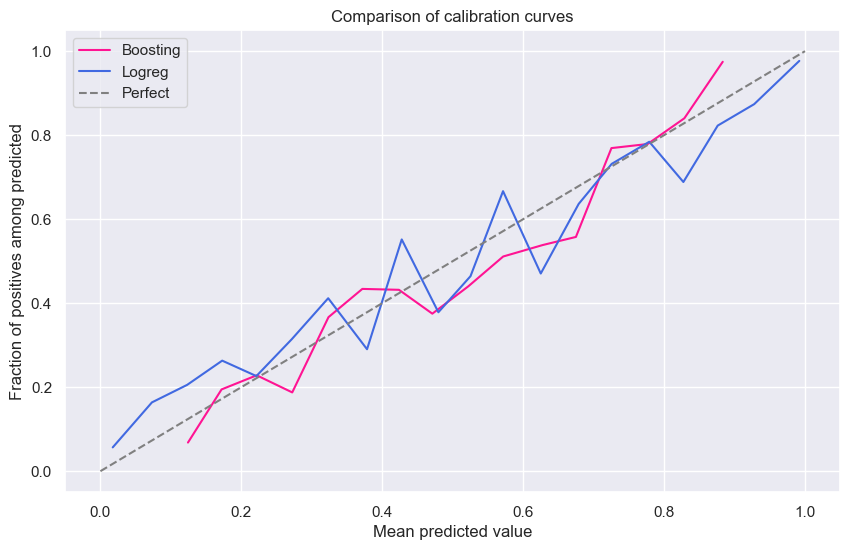

In [180]:
boosting_prob_true, boosting_prob_pred = calibration_curve(y_test, boosting_pred, n_bins=20)
logreg_prob_true, logreg_prob_pred = calibration_curve(y_test, logreg_pred, n_bins=20)

plt.figure(figsize=(10, 6))
plt.plot(boosting_prob_pred, boosting_prob_true, label='Boosting', color='deeppink')
plt.plot(logreg_prob_pred, logreg_prob_true, label='Logreg', color='royalblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives among predicted')
plt.title('Comparison of calibration curves')
plt.legend()
plt.show()

В целом, обе модели хорошо себя показывают, но бустинг не очень хорошо себя ведет по краям (как будто направлено от идеального классификатора). Глобально бустинг хорошо отражает поведение логистической регрессии и даже глаже. При неудачном подборе гиперпараметров кривая бустинга может вообще улететь далеко. Думаю, что такое поведение в хвостах калибровочной кривой может сигнализировать о том, что модель недооценивает сложность данных. Судя по тому, как розовая кривая отклоняется вниз около центра, я могу предположить, что имеем дело с несблансированными классами (но я не уверена, если честно, что это роляет).

In [189]:
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value {value}: Count {count}")

Value -1: Count 8234
Value 1: Count 15298


А, ну да, положительный класс в два раза больше

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

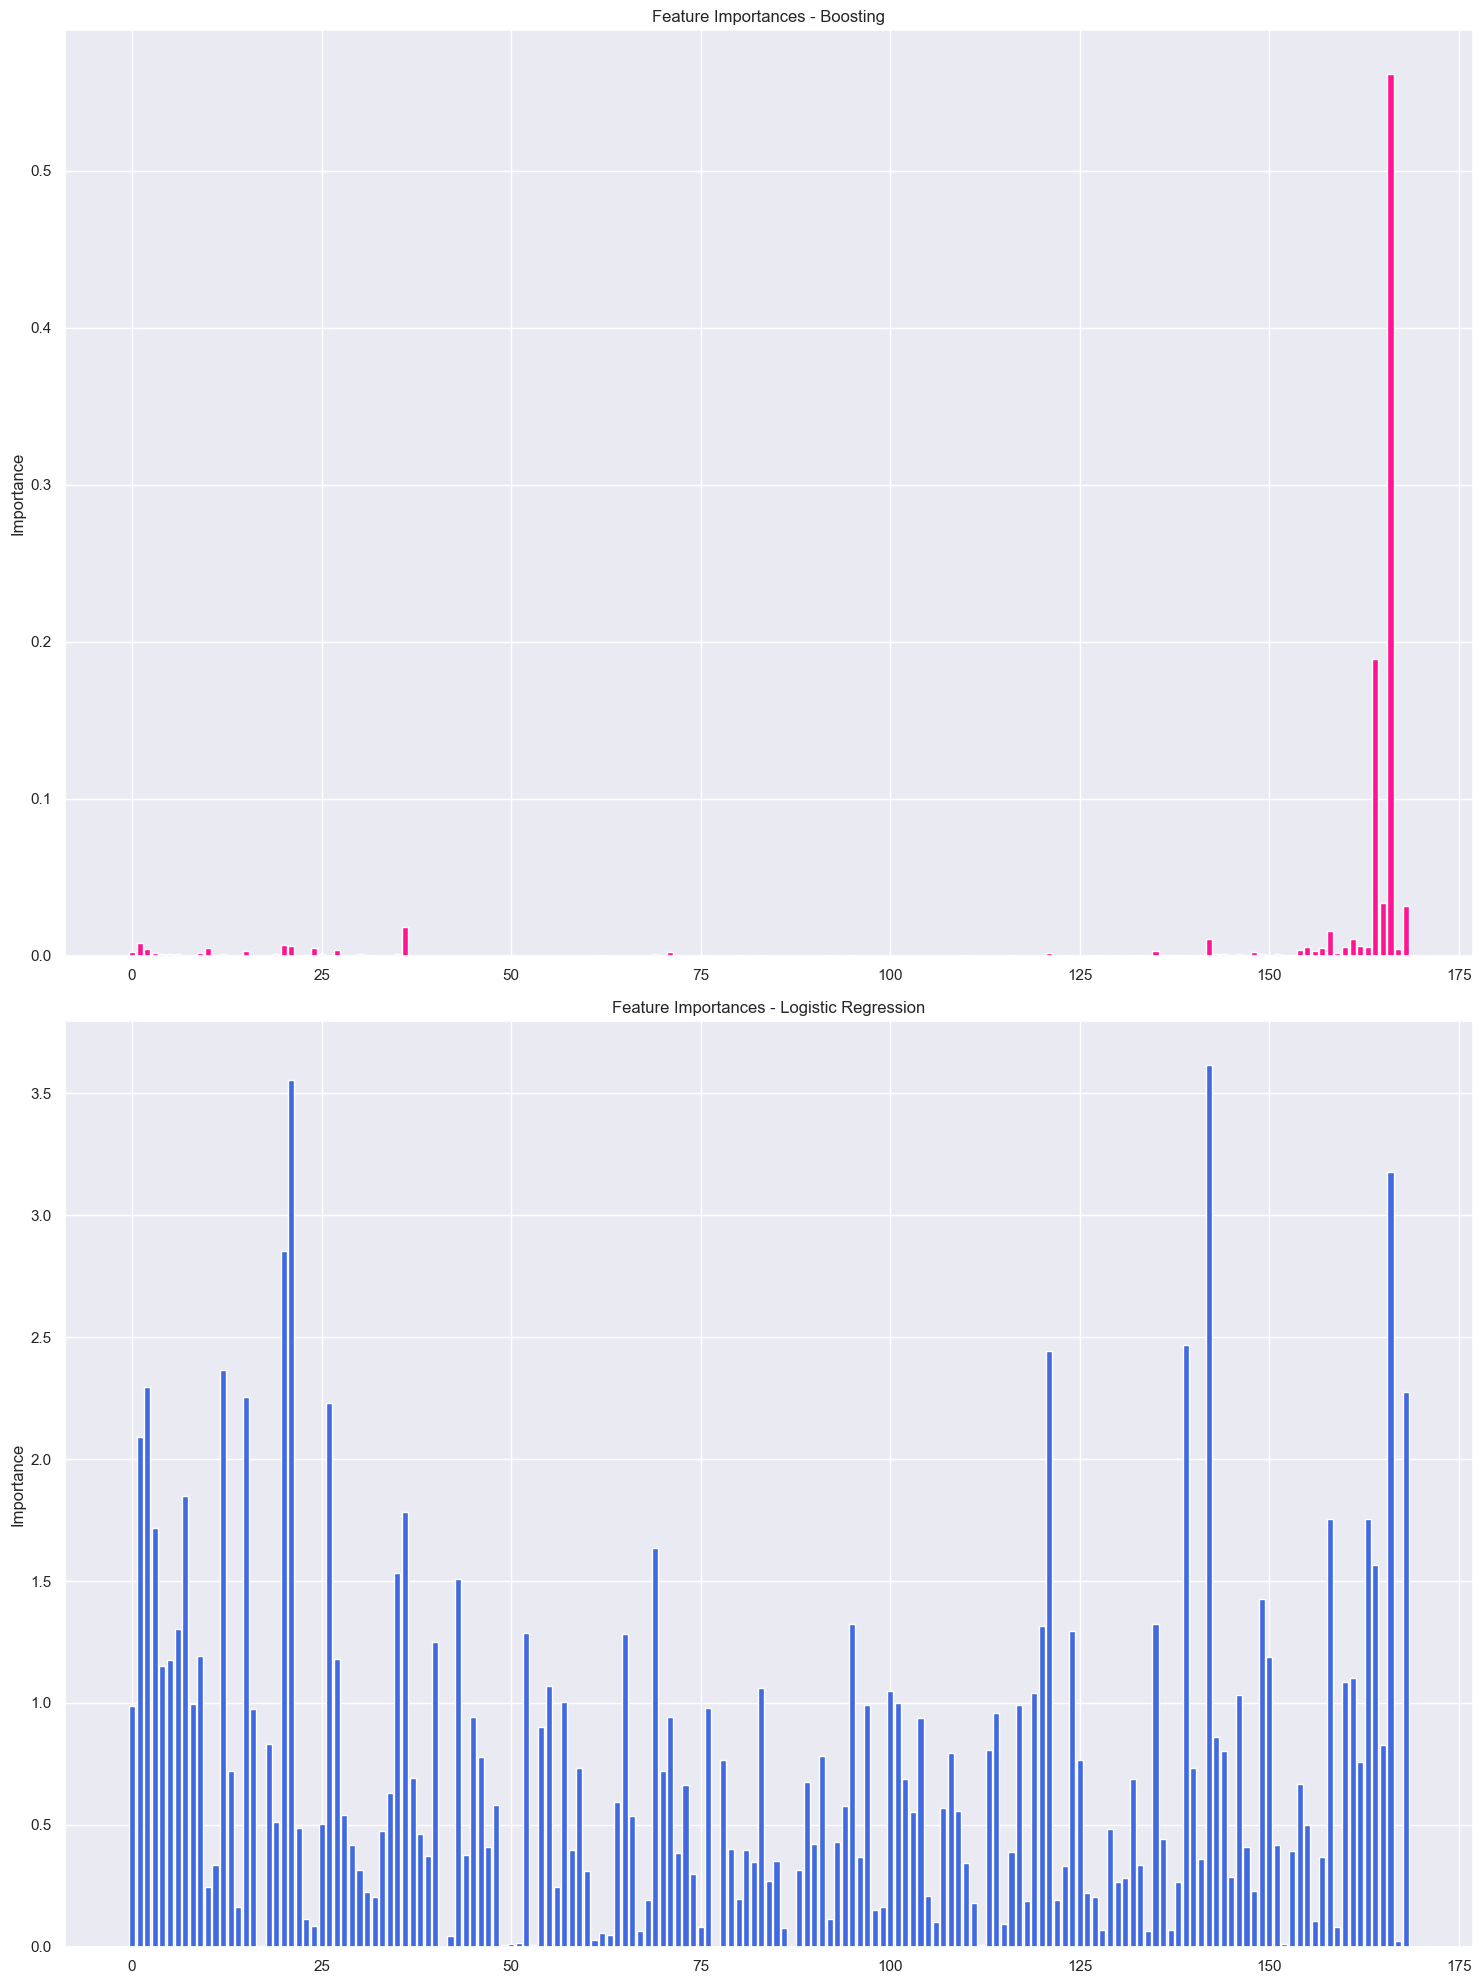

In [214]:
boosting_feature_importances = best_boosting_model.feature_importances_
logreg_feature_weights = np.abs(logreg_model.coef_[0])

fig, axes = plt.subplots(2, 1, figsize=(15, 20))
n_features = np.arange(x_test.shape[1])

axes[0].bar(n_features, boosting_feature_importances, color='deeppink')
axes[0].set_title('Feature Importances - Boosting')
axes[0].set_ylabel('Importance')

axes[1].bar(n_features, logreg_feature_weights, color='royalblue')
axes[1].set_title('Feature Importances - Logistic Regression')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

Бустинг для себя выделяет гораздо меньше признаков (но при этом веса выбранных могут быть большими), в то время как логрег обращает внимание вообще на все признаки. С одной стороны, так бустинг не переучится, потому что мы деревья строим по самым ярким и важным признакам. Но с другой стороны, проигнорированные признаки могут в комплексе как-то неожиданно влиять.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [244]:
quantile_threshold = 0.6
threshold = np.quantile(boosting_feature_importances, quantile_threshold)
selected_features = np.where(boosting_feature_importances >= threshold)[0]
selected_features

array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  12,  15,  19,  20,
        21,  23,  24,  25,  27,  30,  31,  35,  36,  62,  69,  71,  75,
        80,  95, 110, 116, 121, 127, 128, 130, 133, 135, 136, 137, 138,
       139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168])

In [249]:
x_train_filtered = x_train.toarray()[:, selected_features]
x_val_filtered = x_valid.toarray()[:, selected_features]
x_test_filtered = x_test.toarray()[:, selected_features]

boosting = Boosting(**params)
boosting.fit(x_train_filtered, y_train, x_val_filtered, y_valid)
filtered_auc_roc = boosting.score(x_test_filtered, y_test)

In [253]:
print('Best AUC-ROC = ', best_auc_roc)
print('Number of features: ', x_test.shape[1])
print()
print('Foltered AUC-ROC = ', filtered_auc_roc)
print('Number of features: ', x_test_filtered.shape[1])

Best AUC-ROC =  0.9413836480999463
Number of features:  169

Foltered AUC-ROC =  0.9374656562587089
Number of features:  68


Качество упало, но зато теперь гораздо меньше признаков

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [276]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge

In [288]:
def blending(models, x_train, y_train, x_test):
    x_train_blend = list(zip(*[model.predict_proba(x_train)[:, 1] for model in models]))
    x_test_blend = list(zip(*[model.predict_proba(x_test)[:, 1] for model in models]))
    blender = Ridge()
    blender.fit(x_train_blend, y_train)
    return blender.predict(x_test_blend)

models = [best_boosting_model, logreg_model]
blending_pred = blending(models, x_valid, y_valid, x_test)
auc_blend = roc_auc_score(y_test, blending_pred)
print(f'AUC-ROC with blending = {auc_blend}')


AUC-ROC with blending = 0.9406457489336711


[Читала статью](https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/), поняла, что что-то суперумное делать – сложное. Судя по скору, лучше не стало, потому что мы и так уже очень хорошо подобрали гиперпараметры и бустинг делал все, что мог.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
%pip install catboost

In [291]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=False)
auc_cb = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
print(f'AUC-ROC for CatBoost = {auc_cb}')

AUC-ROC for CatBoost = 0.9407961135087219


Я пыталась подбирать гиперпараметры по сетке, но оно без кросс-валидации само лучше подбирает их...

In [294]:
metrics_df = pd.DataFrame({
    'MyBoostring': [best_auc_roc],
    'Filtered MyBoosting': [filtered_auc_roc],
    'Blended MyBoosting + LogReg': [auc_blend],
    'CatBoost': [auc_cb]
}, index=['AUC-ROC'])
metrics_df

,MyBoostring,Filtered MyBoosting,Blended MyBoosting + LogReg,CatBoost
AUC-ROC,0.941384,0.937466,0.940646,0.940796


Вывод: я хорошо подобрала гиперпараметры для первого решения. Но мне слабо верится в то, что я сделала лучше катбуста: больше похоже на везение. Хуже всего справился вариант с отфильтрованными признаками, но мы уже сказали, что он работает быстрее.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

От Нового Года я жду меньше стресса и больше времени на внеучебные хобби (рисование, вязание, тортики, стрельба).

А еще можно было бы попробовать устроиться на работу. Если честно, учиться уже сил нет (но после каникул может быть восстановлюсь и хотелок будет больше!)

Спасибо всем, кто читал мой блог "Делаю МО и представляю себя МОПсом".

У меня нет елки дома :(    
    
Поэтому фотографируюсь в яндексе

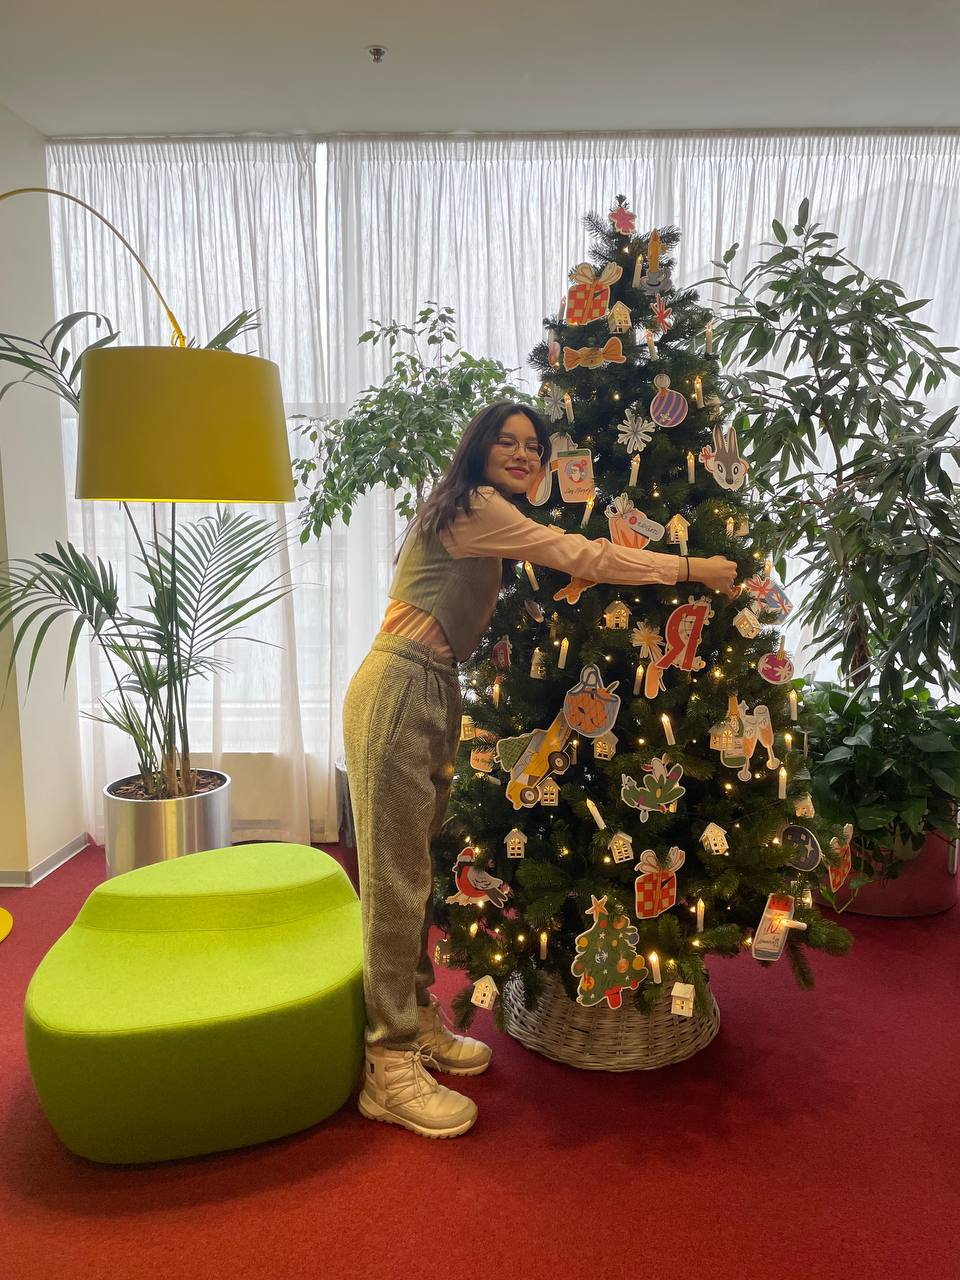

In [295]:
from IPython.display import Image, display
img_path = '286d48bd-375b-41f8-a9d8-3d8809d652ac.jpeg'
display(Image(filename=img_path))

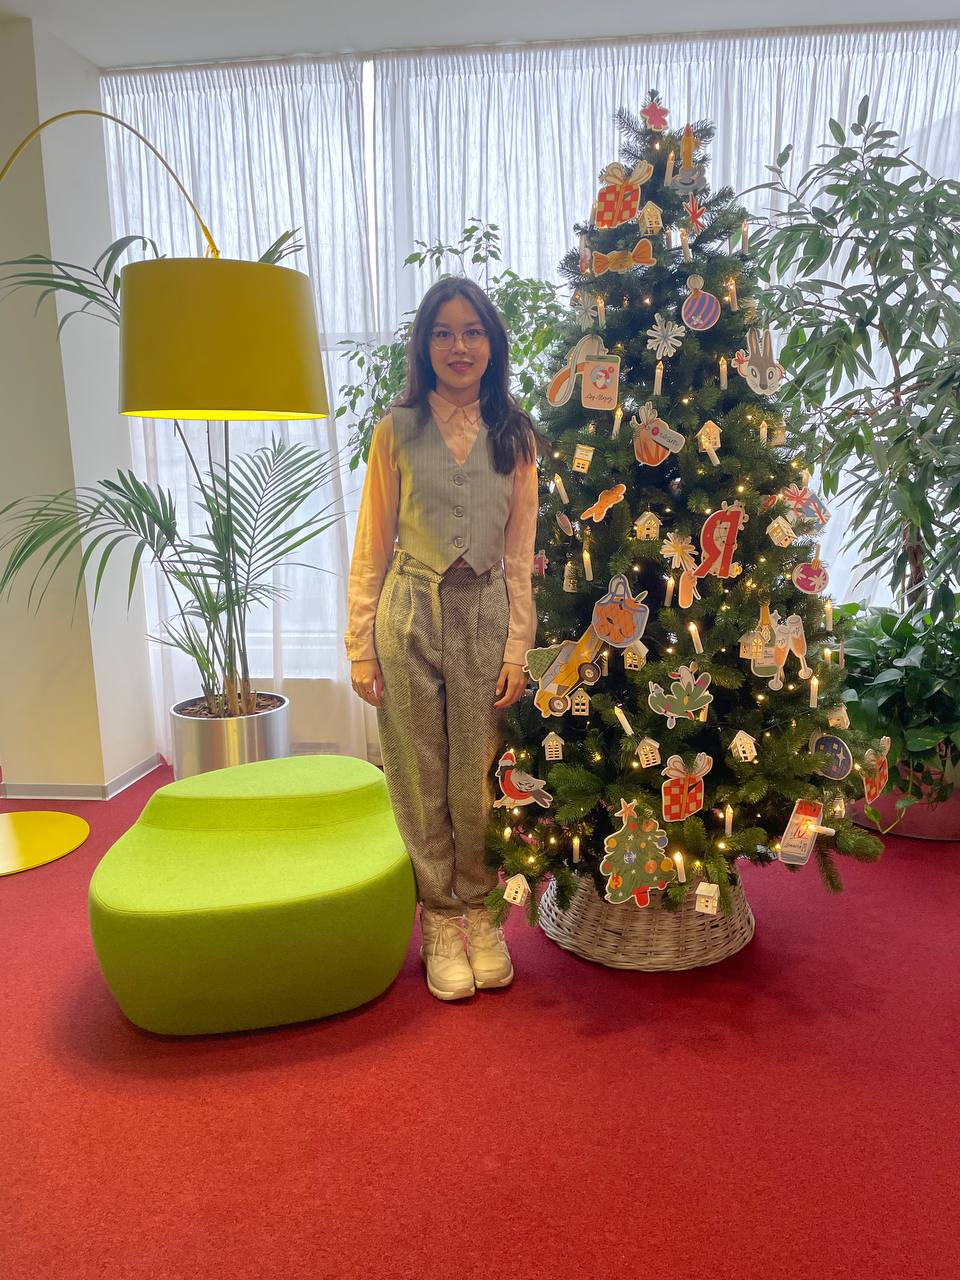

In [296]:
img_path = '536bbae9-b027-41ec-ba31-c495c59f7a43.jpeg'
display(Image(filename=img_path))